In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [5]:
import requests
# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b8e160125439fb51460a5b0a9d19b4b


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b8e160125439fb51460a5b0a9d19b4b&q=Boston


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather.status_code

200

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":71.62,"feels_like":71.87,"temp_min":67.1,"temp_max":75.65,"pressure":1013,"humidity":72},"visibility":10000,"wind":{"speed":11.01,"deg":0,"gust":0},"clouds":{"all":20},"dt":1634244200,"sys":{"type":2,"id":2009921,"country":"US","sunrise":1634208958,"sunset":1634249042},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 71.62,
  'feels_like': 71.87,
  'temp_min': 67.1,
  'temp_max': 75.65,
  'pressure': 1013,
  'humidity': 72},
 'visibility': 10000,
 'wind': {'speed': 11.01, 'deg': 0, 'gust': 0},
 'clouds': {'all': 20},
 'dt': 1634244200,
 'sys': {'type': 2,
  'id': 2009921,
  'country': 'US',
  'sunrise': 1634208958,
  'sunset': 1634249042},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
boston_url = url + "&q=" + "Bston"
boston_weather = requests.get(boston_url)
if boston_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
print (boston_url)

City weather not found.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b8e160125439fb51460a5b0a9d19b4b&q=Bston


In [25]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 69.01,
  'feels_like': 69.13,
  'temp_min': 64.94,
  'temp_max': 73.45,
  'pressure': 1012,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 11.01, 'deg': 0, 'gust': 0},
 'clouds': {'all': 20},
 'dt': 1634248072,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1634208958,
  'sunset': 1634249042},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [26]:
# Get the JSON data.
boston_data = city_weather.json()

In [28]:
boston_data['sys']["country"]

'US'

In [29]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 73.45 75 20 11.01


In [31]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-10-14 21:47:52'

In [36]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Cloudiness": city_clouds,
                          "Country": city_country,
                          "Date": city_date,
                          "Humidity": city_humidity,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,                         
                          "Wind Speed": city_wind})
                          

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | puri
Processing Record 3 of Set 1 | salalah
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | kermanshah
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | boshnyakovo
Processing Record 13 of Set 1 | jiayuguan
Processing Record 14 of Set 1 | sistranda
Processing Record 15 of Set 1 | marsh harbour
Processing Record 16 of Set 1 | porto belo
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | sobolevo
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | bouca
Processing Record 21 of Set 1 | marawi
Processing Record 22 of Set 1 | kairana
Processing

Processing Record 37 of Set 4 | kvitok
Processing Record 38 of Set 4 | churapcha
Processing Record 39 of Set 4 | dapaong
Processing Record 40 of Set 4 | butaritari
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | hun
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | conceicao do araguaia
Processing Record 45 of Set 4 | biabou
Processing Record 46 of Set 4 | samusu
City not found. Skipping...
Processing Record 47 of Set 4 | port macquarie
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | upernavik
Processing Record 50 of Set 4 | raga
Processing Record 1 of Set 5 | sioux lookout
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | batagay-alyta
Processing Record 4 of Set 5 | batemans bay
Processing Record 5 of Set 5 | patna
Processing Record 6 of Set 5 | san vicente
Processing Record 7 of Set 5 | khasan
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | taltal
Processing Record

Processing Record 30 of Set 8 | tuatapere
Processing Record 31 of Set 8 | iskateley
Processing Record 32 of Set 8 | bahia blanca
Processing Record 33 of Set 8 | tlaltenango
Processing Record 34 of Set 8 | bandarbeyla
Processing Record 35 of Set 8 | jaisalmer
Processing Record 36 of Set 8 | sitka
Processing Record 37 of Set 8 | rabat
Processing Record 38 of Set 8 | usilampatti
Processing Record 39 of Set 8 | ituni
City not found. Skipping...
Processing Record 40 of Set 8 | kidal
Processing Record 41 of Set 8 | padang
Processing Record 42 of Set 8 | henties bay
Processing Record 43 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 8 | desna
Processing Record 45 of Set 8 | altamont
Processing Record 46 of Set 8 | taoyuan
Processing Record 47 of Set 8 | aklavik
Processing Record 48 of Set 8 | half moon bay
Processing Record 49 of Set 8 | touros
Processing Record 50 of Set 8 | amderma
City not found. Skipping...
Processing Record 1 of Set 9 | buala
Processing R

Processing Record 17 of Set 12 | miri
Processing Record 18 of Set 12 | remedios
Processing Record 19 of Set 12 | zhuzhou
Processing Record 20 of Set 12 | nouakchott
Processing Record 21 of Set 12 | carauari
Processing Record 22 of Set 12 | hasaki
Processing Record 23 of Set 12 | maltahohe
Processing Record 24 of Set 12 | nioki
Processing Record 25 of Set 12 | aktau
Processing Record 26 of Set 12 | tiznit
Processing Record 27 of Set 12 | olden
Processing Record 28 of Set 12 | kargasok
Processing Record 29 of Set 12 | beinamar
Processing Record 30 of Set 12 | harnosand
Processing Record 31 of Set 12 | brookhaven
Processing Record 32 of Set 12 | prenzlau
Processing Record 33 of Set 12 | homer
Processing Record 34 of Set 12 | beloha
Processing Record 35 of Set 12 | chagda
City not found. Skipping...
Processing Record 36 of Set 12 | sao gabriel da cachoeira
Processing Record 37 of Set 12 | turkmenabat
Processing Record 38 of Set 12 | kalmunai
-----------------------------
Data Retrieval Com

In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,100,ZA,2021-10-14 22:30:19,82,-34.4187,19.2345,56.89,3.71
1,Puri,100,IN,2021-10-14 22:30:19,92,19.8000,85.8500,79.32,11.81
2,Salalah,20,OM,2021-10-14 22:30:20,61,17.0151,54.0924,77.09,3.44
3,Hithadhoo,100,MV,2021-10-14 22:30:20,77,-0.6000,73.0833,83.21,24.49
4,New Norfolk,100,AU,2021-10-14 22:30:21,86,-42.7826,147.0587,57.65,3.49
5,Vaini,20,TO,2021-10-14 22:30:21,83,-21.2000,-175.2000,78.96,12.66
6,Kermanshah,0,IR,2021-10-14 22:30:15,21,34.3142,47.0650,59.90,6.91
7,Busselton,77,AU,2021-10-14 22:29:14,82,-33.6500,115.3333,53.04,11.30
8,Luderitz,10,NA,2021-10-14 22:30:22,88,-26.6481,15.1594,56.16,11.32
9,Kapaa,90,US,2021-10-14 22:30:22,72,22.0752,-159.3190,84.18,8.01


In [39]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-10-14 22:30:19,-34.4187,19.2345,56.89,82,100,3.71
1,Puri,IN,2021-10-14 22:30:19,19.8000,85.8500,79.32,92,100,11.81
2,Salalah,OM,2021-10-14 22:30:20,17.0151,54.0924,77.09,61,20,3.44
3,Hithadhoo,MV,2021-10-14 22:30:20,-0.6000,73.0833,83.21,77,100,24.49
4,New Norfolk,AU,2021-10-14 22:30:21,-42.7826,147.0587,57.65,86,100,3.49


In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

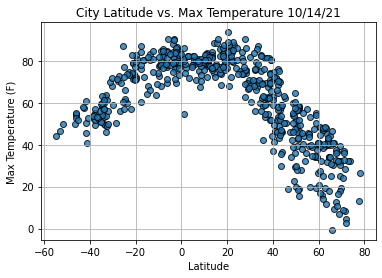

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

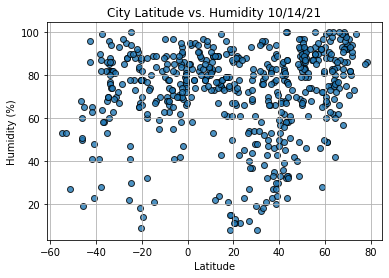

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

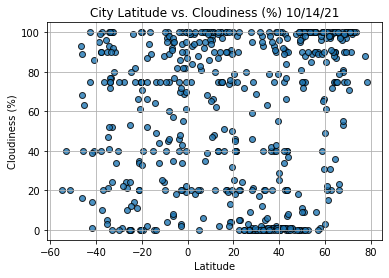

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

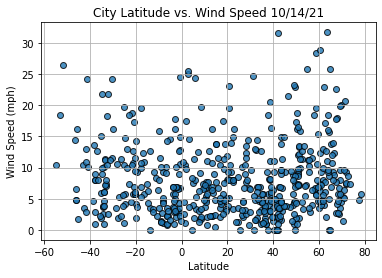

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [58]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [59]:
index13 = city_data_df.loc[13]
index13

City                    Sistranda
Country                        NO
Date          2021-10-14 22:30:24
Lat                       63.7256
Lng                         8.834
Max Temp                    44.91
Humidity                       62
Cloudiness                    100
Wind Speed                   31.7
Name: 13, dtype: object

In [60]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
541     True
542    False
543    False
544     True
545     True
Name: Lat, Length: 546, dtype: bool

In [61]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Puri,IN,2021-10-14 22:30:19,19.8000,85.8500,79.32,92,100,11.81
2,Salalah,OM,2021-10-14 22:30:20,17.0151,54.0924,77.09,61,20,3.44
6,Kermanshah,IR,2021-10-14 22:30:15,34.3142,47.0650,59.90,21,0,6.91
9,Kapaa,US,2021-10-14 22:30:22,22.0752,-159.3190,84.18,72,90,8.01
11,Boshnyakovo,RU,2021-10-14 22:30:23,49.6333,142.1667,36.25,97,100,22.84


In [62]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

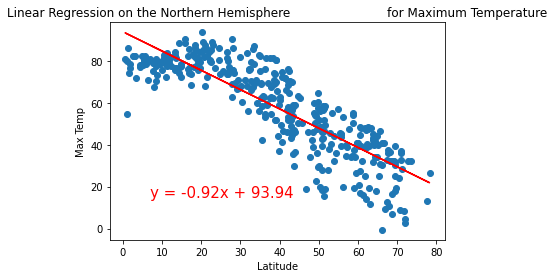

LinregressResult(slope=-0.9213788910771367, intercept=93.93741692917811, rvalue=-0.8519493532988835, pvalue=3.9603668135273594e-107, stderr=0.029282515830319645, intercept_stderr=1.2837979611446202)


In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(7,15))

print(linregress(x_values, y_values))

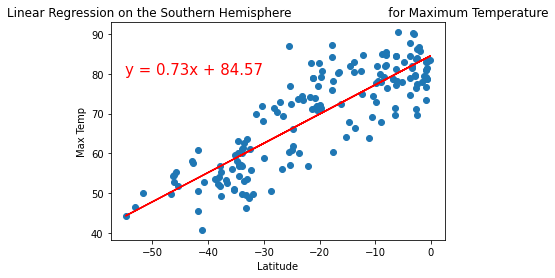

LinregressResult(slope=0.7348110851771507, intercept=84.5749170651921, rvalue=0.8490648783080544, pvalue=2.0002363148940255e-48, stderr=0.03527373202781064, intercept_stderr=0.8805814625240714)


In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,80))

print(linregress(x_values, y_values))

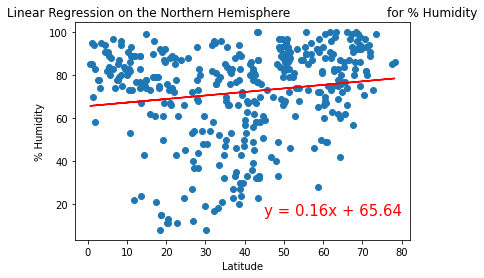

LinregressResult(slope=0.16438718058912125, intercept=65.64345148772752, rvalue=0.15105878753670174, pvalue=0.0033220343081633535, stderr=0.055625472401466064, intercept_stderr=2.438720377392141)


In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,15))

print(linregress(x_values, y_values))

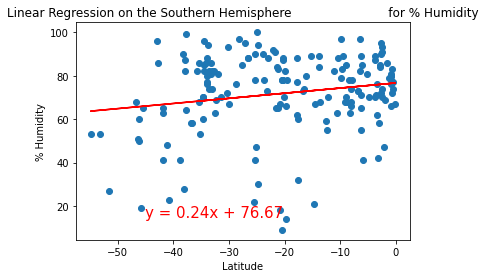

LinregressResult(slope=0.23665718725266557, intercept=76.66884323438148, rvalue=0.18319267066590397, pvalue=0.01679388258502775, stderr=0.09798159660607222, intercept_stderr=2.446034844620152)


In [85]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-45,15))

print(linregress(x_values, y_values))

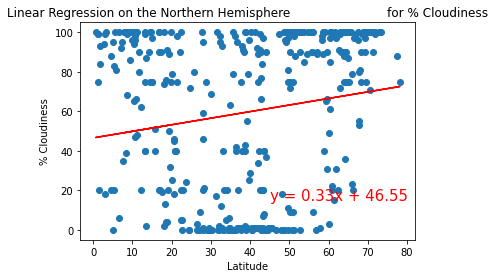

LinregressResult(slope=0.3325607795431141, intercept=46.55143676893261, rvalue=0.16568526439831488, pvalue=0.001262489528289159, stderr=0.10235450294004256, intercept_stderr=4.487404803256049)


In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,15))

print(linregress(x_values, y_values))

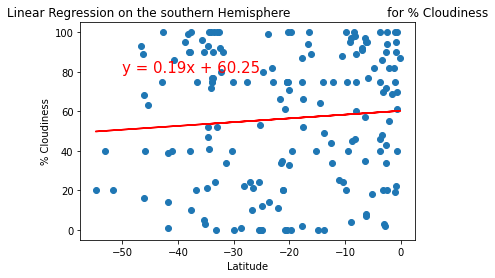

LinregressResult(slope=0.19070985064834756, intercept=60.24576557765417, rvalue=0.08070798568454698, pvalue=0.2954468300823488, stderr=0.1817117039803123, intercept_stderr=4.536292273314526)


In [88]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,80))

print(linregress(x_values, y_values))

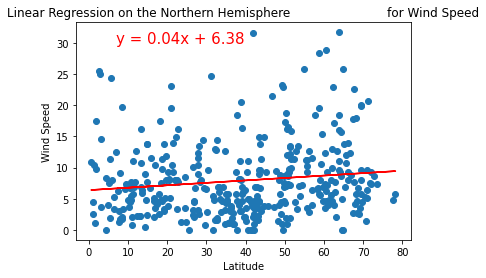

LinregressResult(slope=0.03895120564085312, intercept=6.381073781699157, rvalue=0.13184193938478267, pvalue=0.010491985547725272, stderr=0.015143414606569653, intercept_stderr=0.6639144296663244)


In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(7,30))
print(linregress(x_values, y_values))

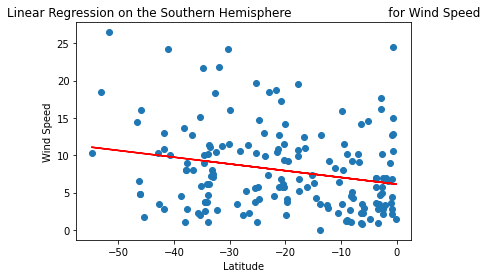

LinregressResult(slope=-0.0903052409184482, intercept=6.119386686791219, rvalue=-0.23144032133005432, pvalue=0.0023919270626537987, stderr=0.02928631801636477, intercept_stderr=0.7311102984641066)


In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
print(linregress(x_values, y_values))